In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('pima-data.csv')
df.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [19]:
df.diabetes.value_counts()

False    500
True     268
Name: diabetes, dtype: int64

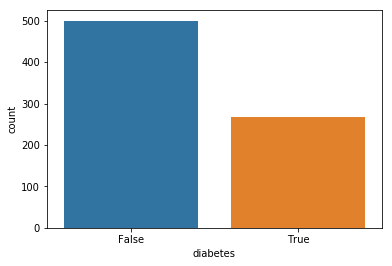

In [21]:
sns.countplot(df.diabetes)
plt.show()

In [4]:
# Check for  null values

df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

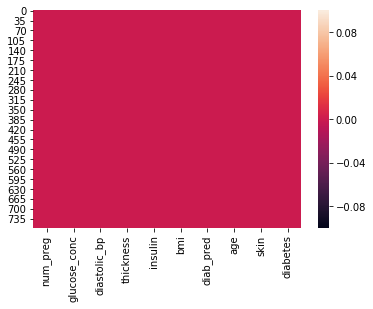

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
corr = df.corr()
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


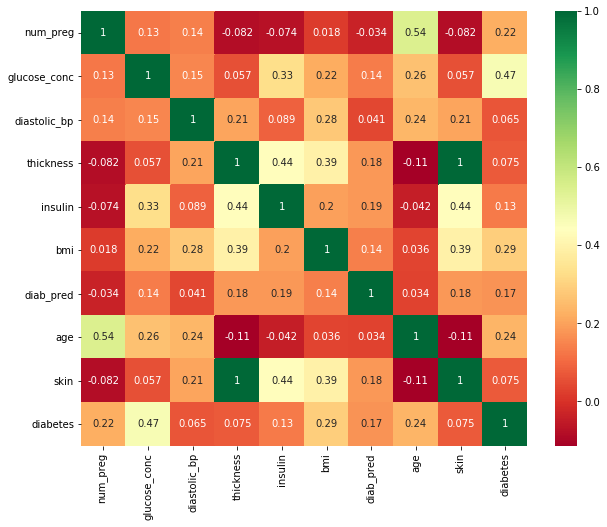

In [8]:
top_features = corr.index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [12]:
#features  Impact on Target Label 
corr['diabetes']

num_preg        0.221898
glucose_conc    0.466581
diastolic_bp    0.065068
thickness       0.074752
insulin         0.130548
bmi             0.292695
diab_pred       0.173844
age             0.238356
skin            0.074752
diabetes        1.000000
Name: diabetes, dtype: float64

In [18]:
def change(row):
    if row:
        return 1
    else:
        return 0

In [22]:
df['diabetes'] = df['diabetes'].apply(change)

In [24]:
df.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [25]:
df.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1


In [42]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [43]:
x = np.array(df.drop(['diabetes'],axis=1))
y = np.array(df['diabetes'])

In [44]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=0,strategy='mean',axis=0)
x = imputer.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Modeling

In [45]:
print(x.shape)
print(y.shape)

(768, 9)
(768,)


In [46]:
from sklearn.model_selection import StratifiedKFold,train_test_split
skf = StratifiedKFold(shuffle=True,n_splits=2)
skf

StratifiedKFold(n_splits=2, random_state=None, shuffle=True)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=10)

In [48]:
print(x_train.shape)
print(x_test.shape)

(537, 9)
(231, 9)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,GridSearchCV

In [51]:
rf = RandomForestClassifier(random_state=10)

rf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [52]:
rf_pred = rf.predict(x_test)
print("Accuracy = {0:.3f}".format(accuracy_score(y_test, rf_pred)))

Accuracy = 0.745


In [53]:
# Hyper parameter tuning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [ ]:
xgb = XGBClassifier()

In [62]:
grid_xgb = GridSearchCV(xgb,param_grid=params,cv=5,n_jobs=-1,scoring='roc_auc')
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:

#rs_CV = RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
#rs_CV.fit(x_train,y_train)

In [63]:
print('Best Params:',grid_xgb.best_params_)
print('\n Best Estimator:',grid_xgb.best_estimator_)
print('\n Best Score:',grid_xgb.best_score_)

Best Params: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 7}

 Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

 Best Score: 0.8458573748033973


In [65]:
xgb_clf = XGBClassifier(colsample_bytree=0.5,gamma=0.1,learning_rate=0.05,max_depth=3,min_child_weight=7)
xgb_clf.fit(x_train,y_train)
xg_pred = xgb_clf.predict(x_test)

In [66]:
print("Test Accuracy = {0:.3f}".format(accuracy_score(y_test, xg_pred)))
print("Train Accuracy = {0:.3f}".format(accuracy_score(y_train, xgb_clf.predict(x_train))))

Test Accuracy = 0.732
Train Accuracy = 0.825


In [67]:
score = cross_val_score(xgb_clf,x_train,y_train,cv=5)

In [68]:
score.mean()

0.7746548915373402

In [70]:
cm = confusion_matrix(y_test,xg_pred)
print(cm)

[[126  18]
 [ 44  43]]


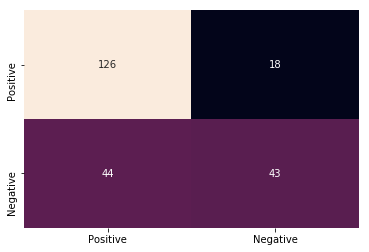

In [73]:
columns =['Positive','Negative']
index =['Positive','Negative']
dfcm = pd.DataFrame(cm,columns=columns,index=index)
sns.heatmap(dfcm,annot=True,fmt='g',cbar=False)
plt.show()


In [75]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64